In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
N = 1000
series = np.sin(0.1*np.arange(N))


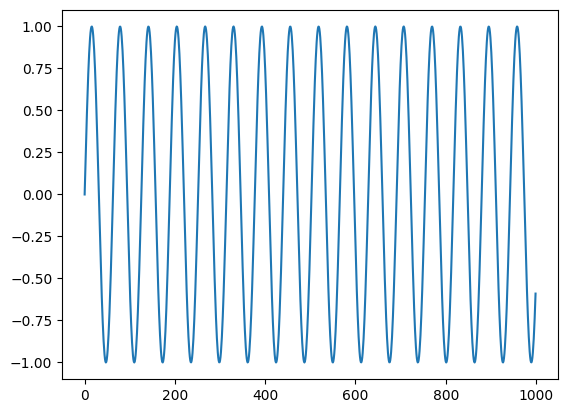

In [3]:
plt.plot(series)

In [4]:
T = 10
X = []
y = []
for t in range(N-T):
  X.append(series[t:t+T])
  y.append(t+T)

In [5]:
# X dimension N * T * D
# y dimension N * 1

X = np.array(X).reshape(-1, T, 1)
y = np.array(y).reshape(-1, 1)

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [7]:
class simpleRNN(nn.Module):

  def __init__(self, n_inputs, n_hidden, n_rnnlayers, n_outputs):
    super().__init__()
    self.D = n_inputs
    self.M = n_hidden
    self.L = n_rnnlayers
    self.K = n_outputs
    self.rnn = nn.RNN(
        input_size = self.D,
        hidden_size = self.M,
        num_layers = self.L,
        nonlinearity = 'tanh',
        batch_first=True
    )
    self.fc = nn.Linear(in_features = self.M,
                        out_features = self.K)

  def forward(self, X):
    # initialize h0, dimensions = no.of layers * N * number of hidden units
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    out, _ = self.rnn(X, h0)
    #print(out,'out')
    #print(_,'_')
    return self.fc(out[:,-1,:])

In [8]:
model = simpleRNN(1, 5, 1,1)
model.to(device)

simpleRNN(
  (rnn): RNN(1, 5, batch_first=True)
  (fc): Linear(in_features=5, out_features=1, bias=True)
)

In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [10]:
X_train = torch.from_numpy(X[:-N//2].astype(np.float32)).to(device)
y_train = torch.from_numpy(y[:-N//2].astype(np.float32)).to(device)
X_test = torch.from_numpy(X[-N//2:].astype(np.float32)).to(device)
y_test = torch.from_numpy(y[-N//2:].astype(np.float32)).to(device)


In [11]:
epoches = 1000
train_loss = []
test_loss = []
for it in range(epoches):
  optimizer.zero_grad()
  pred = model(X_train)
  loss = criterion(y_train, pred)
  train_loss.append(loss.item())
  loss.backward()
  optimizer.step()

  t_pred = model(X_test)
  t_loss = criterion(y_test, t_pred)
  test_loss.append(t_loss.item())


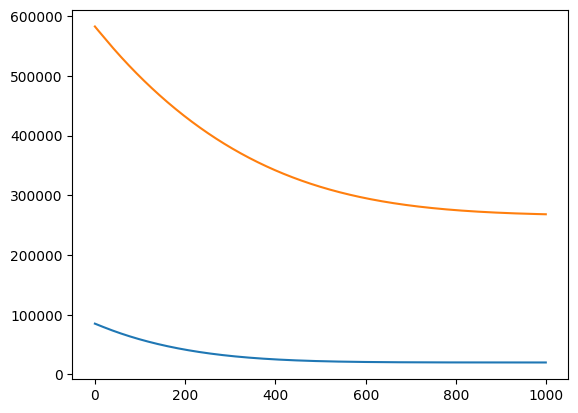

In [12]:
plt.plot(train_loss)
plt.plot(test_loss)